In [53]:
import pickle

from model import *
from inference import *
from criticism import *

In [3]:
with open('data/demand_sample.pickle', 'rb') as f:
    data_samp = pickle.load(f)

In [133]:
data, features = feature_generation(data_samp)
# print(data["data"].shape)
data_data = data["data"]
data_demand = data["demand"]
# data["data"][150:250,0]
data_data[4,:]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columbia/code/probprog-finalproject/model.py:72: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  with pyro.plate("data", len(data)):
Elbo loss: 40219.0546875
Elbo loss: 11132.1015625


{}


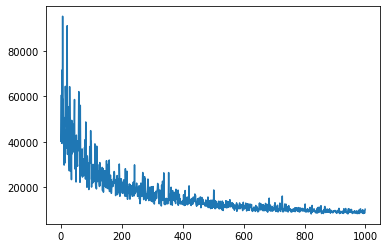

In [58]:
with open('data/demand_sample.pickle', 'rb') as f:
    data_samp = pickle.load(f)


#global features
data, features = feature_generation(data_samp)
p = PoissReg(features, data)

svi, elbo_loss = run_svi(p.model, p.guide,
                         iters=1000,
                         data=data['data'],
                         demand=data['demand'],
                         filename='models/svi_params.pkl')

plot_elbo(elbo_loss)
print(svi.information_criterion())



In [138]:
def posterior_samples(
        wrapped_model,
        svi_posterior,
        data,
        sites,
        num_samples=200):
    """
    Get samples from posterior (or use site 'prediction'
    for posterior predictive

    :param wrapped_model: wrapped model with prediction site
    :param svi_posterior: posterior from svi.run
    :param data: covariate features
    :param sites: list of sites to take marginal over
    :param num_samples: number of samples from posterior
    :return: marginal over sites
    """
    trace_pred = TracePredictive(wrapped_model,
                                 svi_posterior,
                                 num_samples=num_samples)
    post_pred = trace_pred.run(data['data'], None)
    marginal = get_marginal(post_pred, sites)

    return marginal

{'demand': tensor([0., 0., 0.,  ..., 0., 0., 0.]),
 'data': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 1.]])}

In [142]:
svi_posterior = get_svi_posterior(data['data'], data['demand'], svi=svi)

In [156]:
data_demand[0:50]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 2., 2., 2., 0., 4., 3., 3., 4., 0., 0., 2.])

In [137]:


post_samples = posterior_samples(
    p.wrapped_model,
    svi_posterior,
    data,
    ['obs','prediction'],
    num_samples=200)

summary = site_summary(post_samples, ['obs','prediction'])

In [172]:
i = 8241
mu_i = summary["obs"]['mean'][i]
pred_i = summary["prediction"]['mean'][i]
print(mu_i,pred_i)

0.18000000715255737 0.12999999523162842


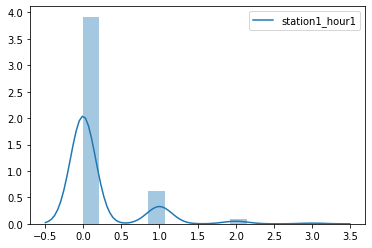

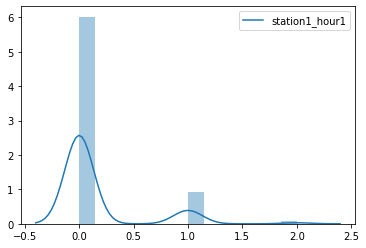

In [136]:
h0_s1 = post_samples[:,0,1] # 200 samples (i) for the 0th (j) hour for station 1 (k)
h1_s1 = post_samples[:,1,1] # 200 samples (i) for the 0th (j) hour for station 1 (k)
import seaborn as sns
# shows demand rate distribution for the specified hour and station
sns.distplot(h0_s1,kde_kws={"label": "station1_hour1"},)
plt.figure()
sns.distplot(h1_s1,kde_kws={"label": "station1_hour1"},)

In [139]:
h0_s1

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       2., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 3., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [62]:
summary# what is the mean here and why is it different from the observation or prediction?


{'obs':        mean       std   5%  25%  50%  75%   95%
 0     0.145  0.393381  0.0  0.0  0.0  0.0  1.00
 1     0.190  0.474368  0.0  0.0  0.0  0.0  1.00
 2     0.190  0.393285  0.0  0.0  0.0  0.0  1.00
 3     0.130  0.351737  0.0  0.0  0.0  0.0  1.00
 4     0.150  0.385021  0.0  0.0  0.0  0.0  1.00
 ...     ...       ...  ...  ...  ...  ...   ...
 8395  0.035  0.184241  0.0  0.0  0.0  0.0  0.00
 8396  0.045  0.207824  0.0  0.0  0.0  0.0  0.00
 8397  0.035  0.184241  0.0  0.0  0.0  0.0  0.00
 8398  0.055  0.249573  0.0  0.0  0.0  0.0  0.05
 8399  0.035  0.184241  0.0  0.0  0.0  0.0  0.00
 
 [8400 rows x 7 columns],
 'prediction':        mean       std   5%  25%  50%  75%  95%
 0     0.185  0.460254  0.0  0.0  0.0  0.0  1.0
 1     0.150  0.385021  0.0  0.0  0.0  0.0  1.0
 2     0.225  0.515464  0.0  0.0  0.0  0.0  1.0
 3     0.175  0.441986  0.0  0.0  0.0  0.0  1.0
 4     0.195  0.456087  0.0  0.0  0.0  0.0  1.0
 ...     ...       ...  ...  ...  ...  ...  ...
 8395  0.010  0.099748  0.0

In [91]:
def model_tmp(x):
    s = pyro.param("s",torch.Tensor([1.5]))
    z = pyro.sample("z",pyro.distributions.Normal(x,s))
    return z**2


In [97]:
trace = pyro.poutine.trace(model_tmp).get_trace(1.0)
logp = trace.log_prob_sum()

In [98]:
logp

tensor(-0.2278, grad_fn=<AddBackward0>)

In [99]:
params = [trace.nodes[name]["value"].unconstrained() for name in trace.param_nodes]

In [100]:
params

[tensor([0.5000], requires_grad=True)]

In [101]:
trace.nodes["z"]

{'type': 'sample',
 'name': 'z',
 'fn': Normal(loc: tensor([1.]), scale: tensor([0.5000], requires_grad=True)),
 'is_observed': False,
 'args': (),
 'kwargs': {},
 'value': tensor([0.9680], grad_fn=<AddBackward0>),
 'infer': {},
 'scale': 1.0,
 'mask': None,
 'cond_indep_stack': (),
 'done': True,
 'stop': False,
 'continuation': None,
 'log_prob_sum': tensor(-0.2278, grad_fn=<SumBackward0>)}